In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error

# utility
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

# Study Case 2
aplikasikan feature engineering yang sudah dipelajari ke dalam model
* Part 2 = Decision tree regressor 
>* one hot encoding = sex, smoker, time
>* ordinal encoding  = day
>* no treatment     = size, total_bil

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Preprocessing

In [3]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'fri':2,'Thur':1,'Sat':3,'Sun':4}}
]
ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)

In [4]:
transformer = ColumnTransformer([
    ('encoder',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('ordinal encoder',ordinal_encoder,['day'])],remainder='passthrough')

## Data Splitting

In [5]:
X=tips.drop('tip',axis=1)
y=tips['tip']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=10)

## Fitting Data

In [7]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.fit_transform(X_test)

## Rename Column

In [8]:
X_train_preprocessed = pd.DataFrame (X_train_preprocessed)
X_test_preprocessed = pd.DataFrame (X_test_preprocessed)

In [9]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [10]:
transformer.transformers_[1][1].get_feature_names()

['day']

In [11]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bil','size']

In [12]:
features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bil', 'size']

In [13]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

## Model Fitting and Evaluation

In [14]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train_preprocessed,y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
y_pred = model.predict(X_test_preprocessed)
print('accuracy =',mean_squared_error(y_test,y_pred))

accuracy = 0.8414314225960587


## Model Properties
### Feature Importance and the decision tree
seberapa penting suatu feature dalam membuat pohon dalam decision tree

In [16]:
importance_table  = pd.DataFrame({
    'imp':model.feature_importances_
}, index=features)

In [17]:
importance_table

,imp
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bil,0.888692
size,0.002329


<AxesSubplot:>

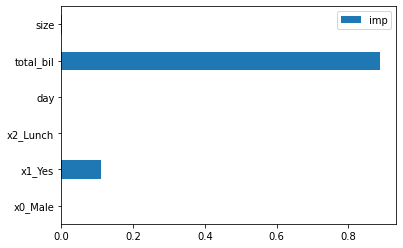

In [18]:
importance_table.plot(kind='barh')

Berdasarkan grafik diatas, features yang paling mempengaruhi besarnya pemberian tips adalah feature total bill

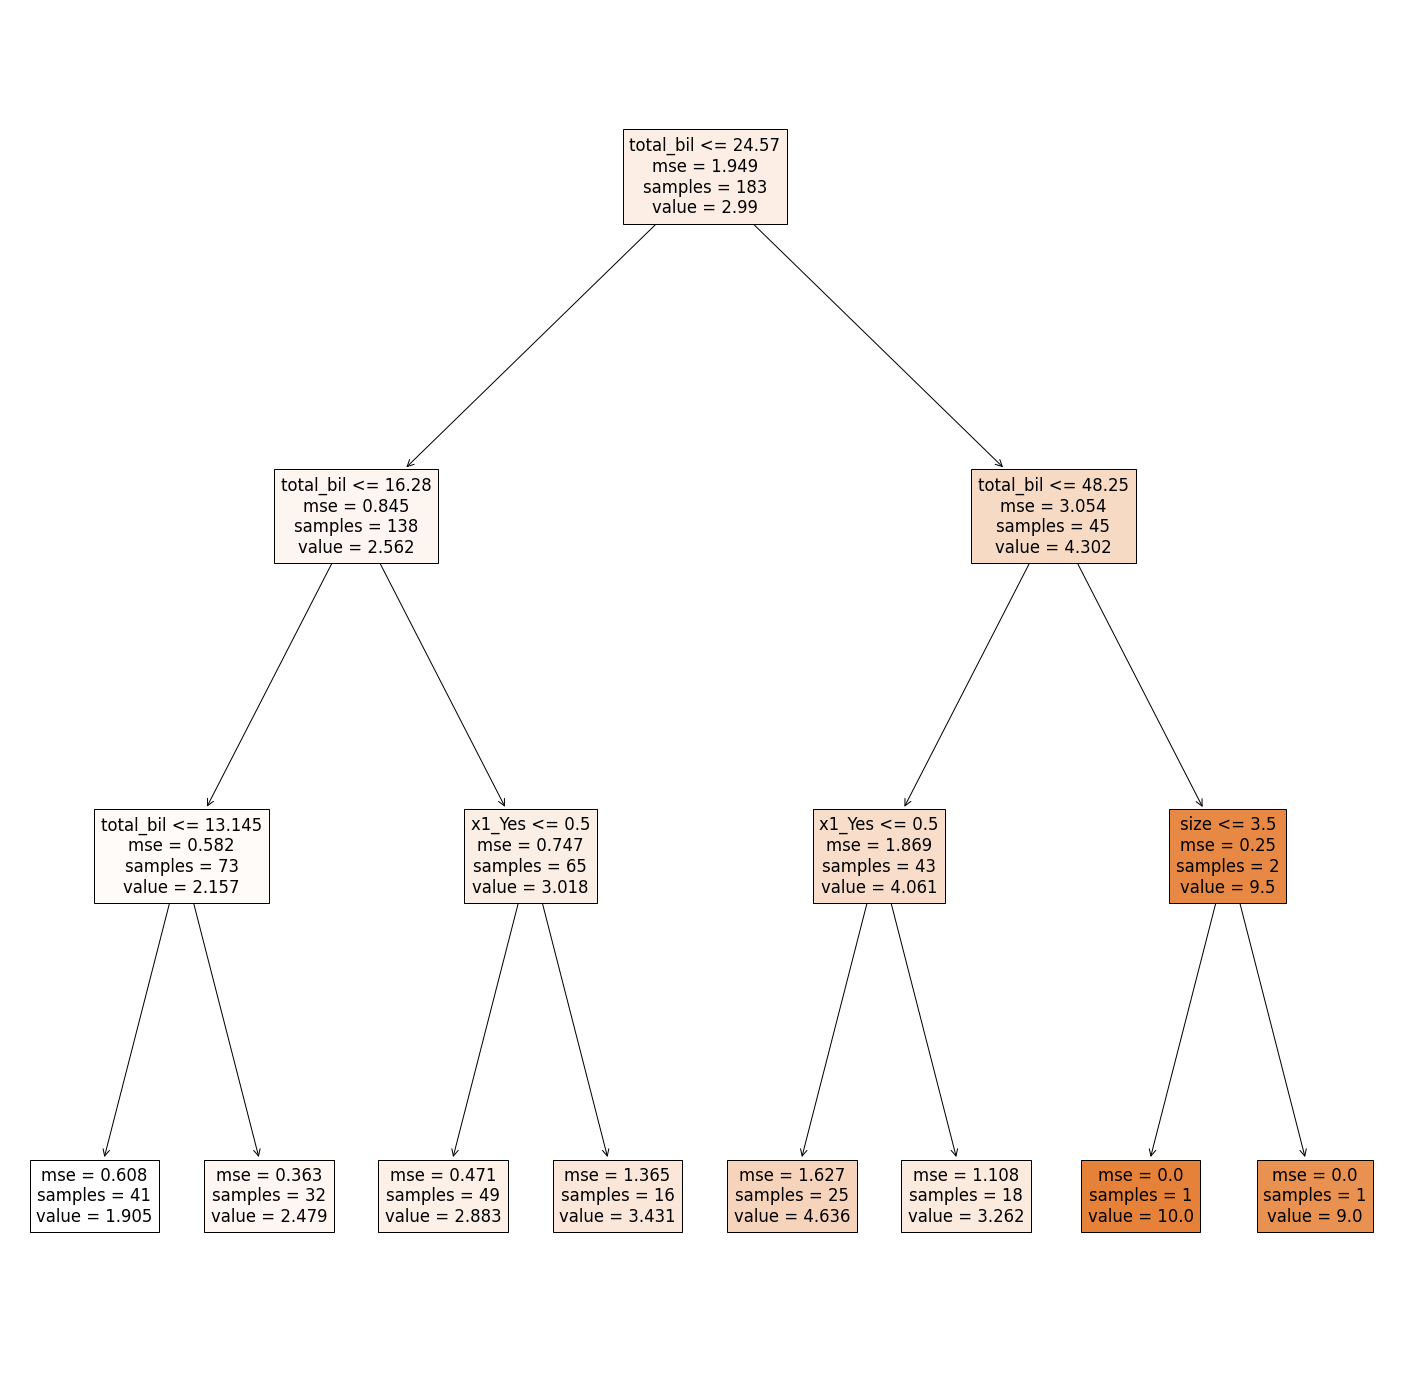

In [19]:
plt.figure(figsize=(25,25))
plot_tree(model,feature_names=features, filled= True)
plt.show()

Kiri true, Kanan False